In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('C:/Users/srija/Documents/DS_Predict_TelecomChurn/data/good_data/telecom_customer_churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [15]:
df[["Churned","Joined","Stayed"]]= pd.get_dummies(df.Customer_Status)

In [16]:
#counting values of the customer status

#replacing the space of the columns names by _
df.columns = df.columns.str.replace(' ', '_')
counts_Customer_Status = df.Customer_Status.value_counts()
counts_Customer_Status

Customer_Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

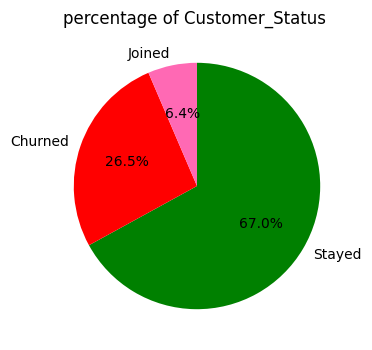

In [17]:
plt.rcParams["figure.figsize"] = (6,4)
mycolors = ["g", "r", "hotpink"]
# making a function for pie charts to use it later to avoid copy the codes
def pie(pie_data,mycolors,title):
    plt.title(title)
    plt.pie(pie_data,labels = pie_data.index, startangle = 90, counterclock = False , autopct='%.1f%%',colors= mycolors)
    
pie(counts_Customer_Status,mycolors,"percentage of Customer_Status ")


In [18]:
clients_per_cities = df.City.value_counts().head(8)
clients_per_cities

City
Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Name: count, dtype: int64

In [19]:
plt.rcParams["figure.figsize"] = (12,5)
def bars(bar_data,title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return bar_data.plot(kind="bar")

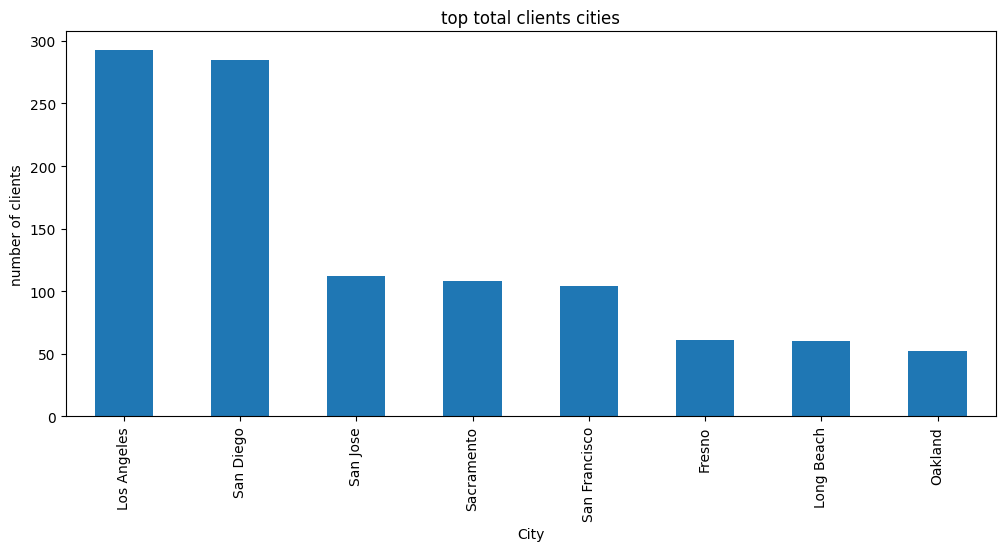

In [20]:
bars(clients_per_cities,"top total clients cities","Cities","number of clients");

In [21]:
top_churned_cities = df.groupby("City")['Churned'].sum().sort_values(ascending=False).head(8)
top_churned_cities

City
San Diego        185
Los Angeles       78
San Francisco     31
San Jose          29
Sacramento        26
Fallbrook         26
Temecula          22
Escondido         16
Name: Churned, dtype: int64

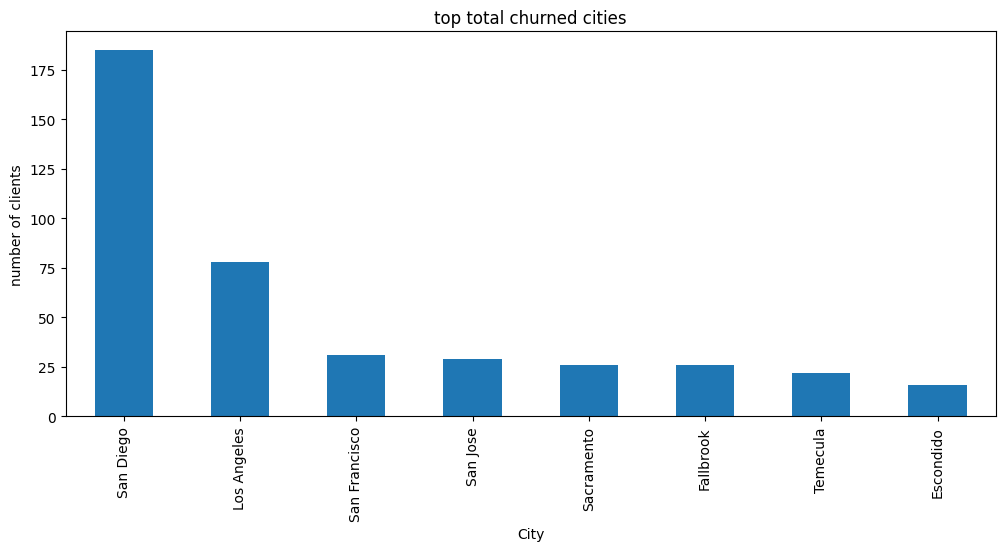

In [22]:
bars(top_churned_cities,"top total churned cities","Cities","number of clients");


<Axes: title={'center': 'top total churned cities'}, xlabel='City', ylabel='number of clients'>

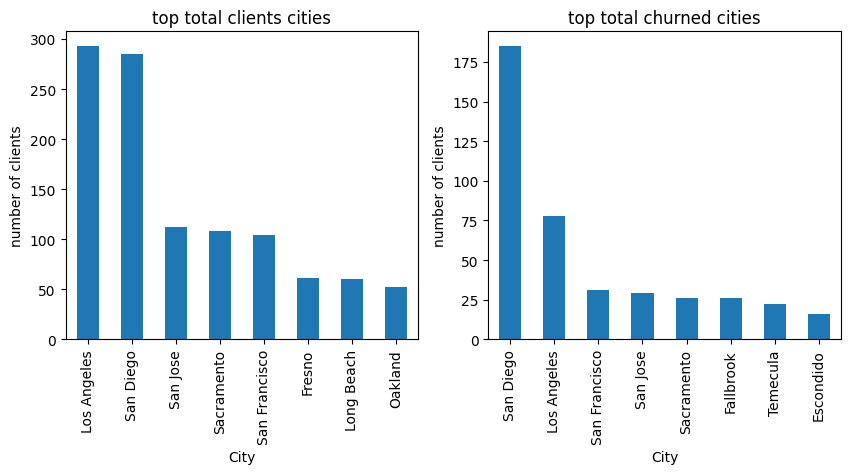

In [24]:
# plotting the 2 previous charts together to be easier to focus on the patterns between them
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1,2,1)
bars(clients_per_cities,"top total clients cities","Cities","number of clients")
plt.subplot(1,2,2)
bars(top_churned_cities,"top total churned cities","Cities","number of clients")

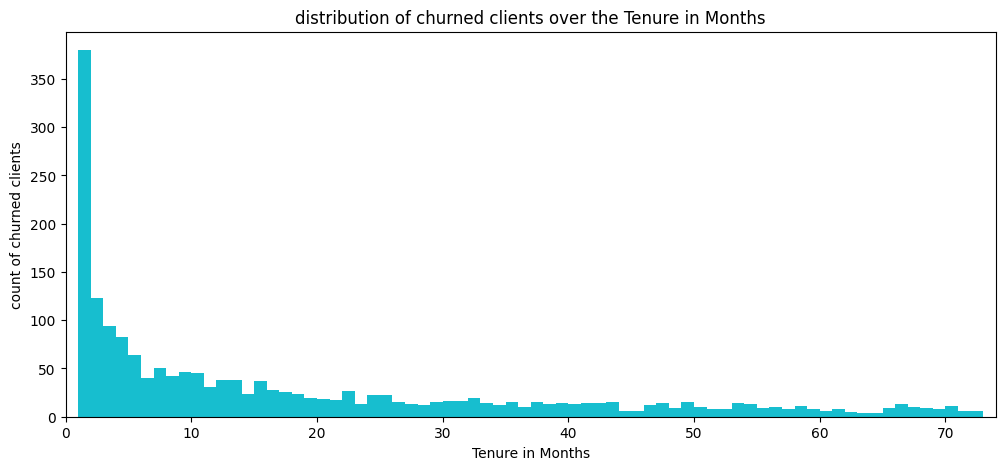

In [27]:
plt.rcParams["figure.figsize"] = (12,5)
bins = np.arange(0, df.query("Churned > 0" ).Tenure_in_Months.max()+2, 1)
plt.hist(df.query("Churned > 0" ).Tenure_in_Months, bins = bins,color = sb.color_palette()[9])
plt.xlim(0,74)
plt.title("distribution of churned clients over the Tenure in Months")
plt.xlabel("Tenure in Months")
plt.ylabel("count of churned clients");

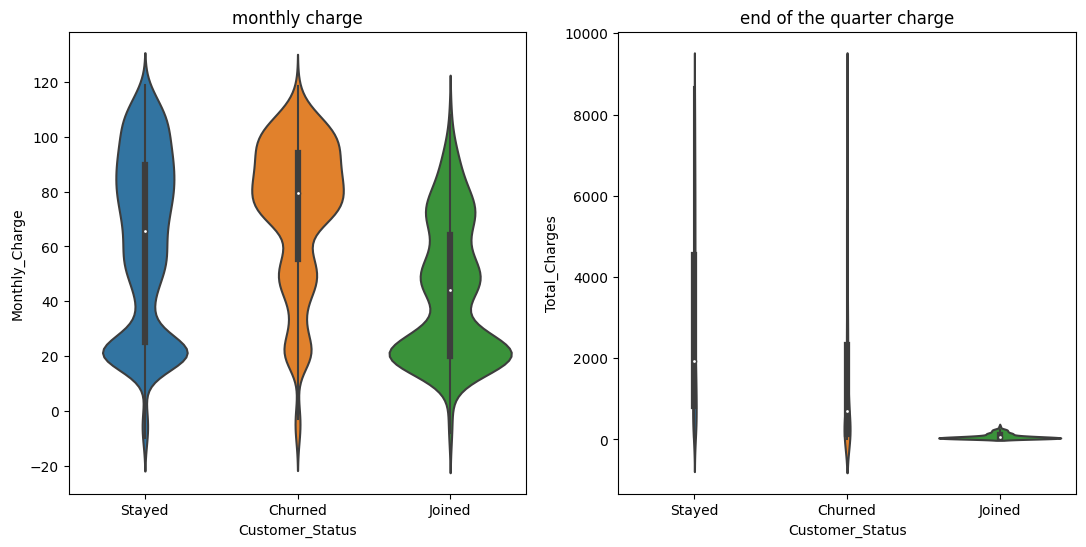

In [28]:
plt.rcParams["figure.figsize"] = (13,6)
plt.subplot(1,2,1)
sb.violinplot(data=df, x='Customer_Status', y='Monthly_Charge')
plt.title("monthly charge")
plt.subplot(1,2,2)
sb.violinplot(data=df, x='Customer_Status', y='Total_Charges')
plt.title("end of the quarter charge");

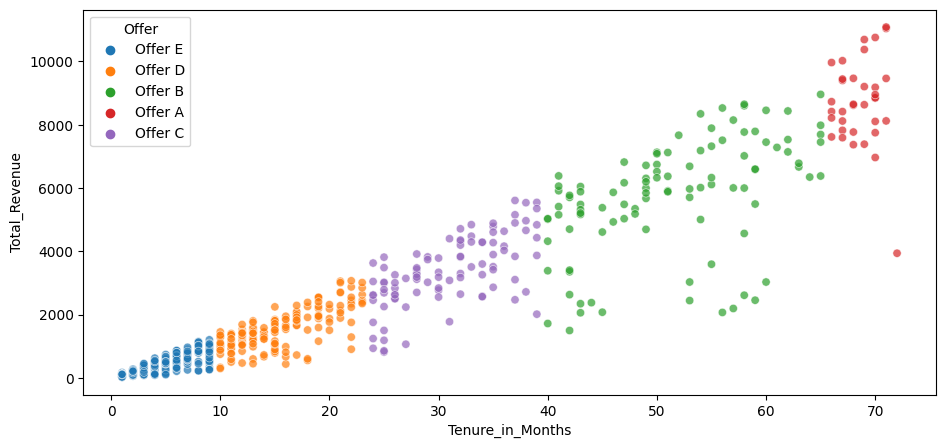

In [29]:
plt.rcParams["figure.figsize"] = (11,5)
churned_df = df.query("Churned > 0" )
sb.scatterplot( x = churned_df.Tenure_in_Months , y = churned_df.Total_Revenue ,alpha= 0.7,hue= churned_df.Offer );

In [30]:
Total_Revenue_per_offer = df.groupby("Offer").Total_Revenue.sum()
Total_Revenue_per_offer

Offer
Offer A    3655220.17
Offer B    4187916.77
Offer C    1145086.87
Offer D     792067.24
Offer E     243452.10
Name: Total_Revenue, dtype: float64

In [31]:
Total_Churned_per_offer = df.groupby("Offer").Churned.sum()
Total_Churned_per_offer

Offer
Offer A     35
Offer B    101
Offer C     95
Offer D    161
Offer E    426
Name: Churned, dtype: int64

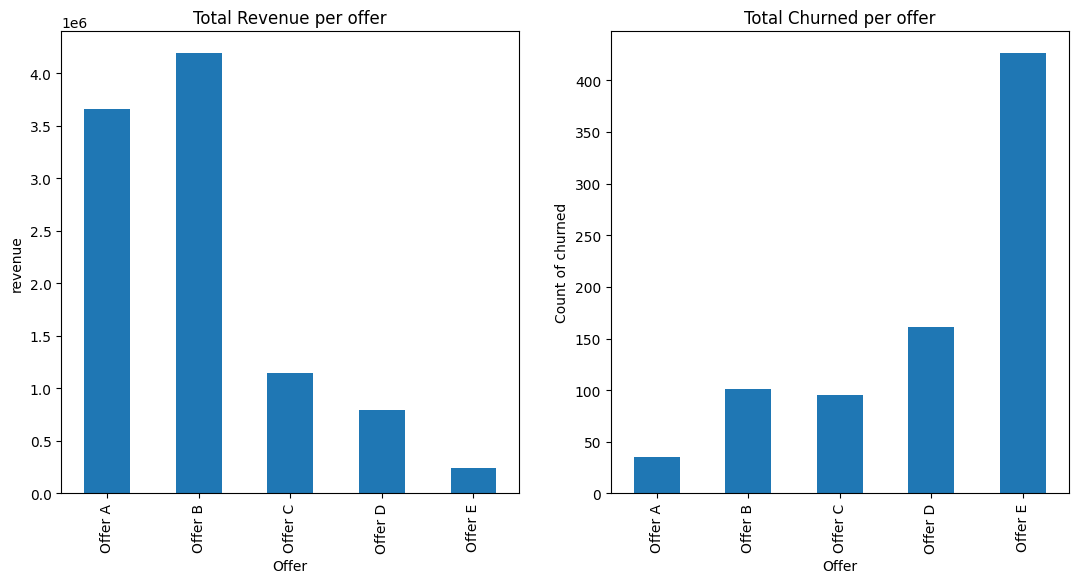

In [32]:
plt.rcParams["figure.figsize"] = (13,6)
plt.subplot(1,2,1)
bars(Total_Revenue_per_offer,"Total Revenue per offer","Offer","revenue")
plt.subplot(1,2,2)
bars(Total_Churned_per_offer,"Total Churned per offer","Offer","Count of churned");

In [33]:
df.Churn_Category.value_counts()

Churn_Category
Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: count, dtype: int64

In [36]:
plt.rcParams["figure.figsize"] = (8,4)
freq = df['Churn_Category'].value_counts() 
order = freq.index
base_color = sb.color_palette()[9]

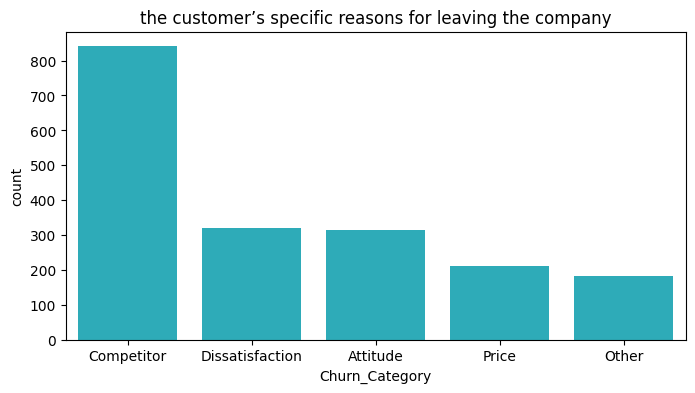

In [37]:
sb.countplot(data = churned_df , x = churned_df.Churn_Category, order = order,color= base_color)
plt.title("the customer’s specific reasons for leaving the company");

In [38]:
churned_comp_df = churned_df.query("Churn_Category == 'Competitor'")
freq = churned_comp_df.Churn_Reason.value_counts()
order = freq.index

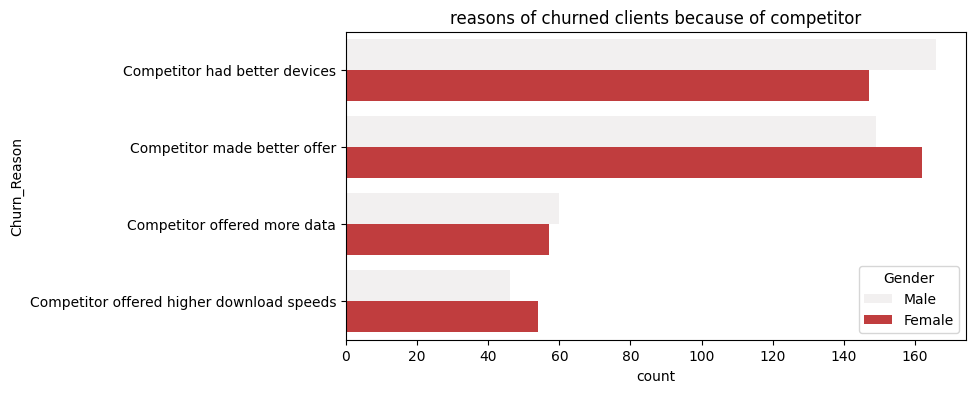

In [39]:
base_color = sb.color_palette()[3]
sb.countplot(data= churned_comp_df , y = churned_comp_df.Churn_Reason, order = order, color= base_color , hue= "Gender" )
plt.title("reasons of churned clients because of competitor");

In [40]:
contract_churned = churned_df.Contract.value_counts()
contract_churned

Contract
Month-to-Month    1655
One Year           166
Two Year            48
Name: count, dtype: int64

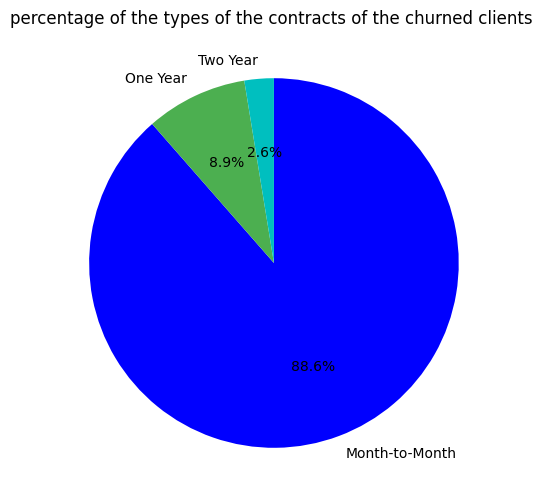

In [42]:
plt.rcParams["figure.figsize"] = (9,6);
mycolors = ["b","#4CAF50", "c"]
pie(contract_churned,mycolors,"percentage of the types of the contracts of the churned clients ")

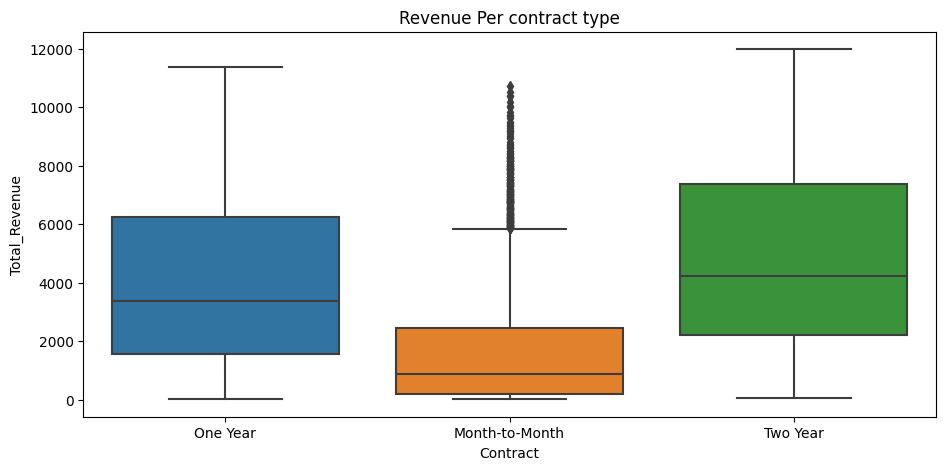

In [43]:
plt.rcParams["figure.figsize"] = (11,5)
sb.boxplot(data=df, x='Contract', y='Total_Revenue')
plt.title("Revenue Per contract type");